In [ ]:
!pip install -U typing_extensions openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 884.1 kB/s eta 0:00:00


# Create Pipeline

In [ ]:
from openai import OpenAI
client = OpenAI(api_key = "")

response = client.completions.create(
  model="ft:gpt-4o-mini-2024-07-18:leaflab:s-analysis-tuned:9tSfa34T",
  prompt="Question: What mental health or wellness services and supports provided by your college are working well? What aspects of mental health and wellness need more attention? For the above question, a participant has given the following comment: i think getting more people to focus 'living on the now' would be very beneficial, a lot of my mental problems stem from either thinking too much of the past (friends i wished i stayed in touch with, social interaction i wished i acted differently in), or worrying too much about the future (what if i lose passion towards my major, what if some domino effect causes me to lose everything i ever cherished in my life) (notice these unhelpful what-ifs), so getting the idea of get out of your head, stop overthinking, and just do is something that has been helpful to me. Do you think the participant seems satisfied with the college services? Give your answer in one word: - if participant is satisfied or suggests nothing that needs attention, write SATISFIED - or if participant is not satisfied or writes about how the system can be improved, write NOT_SATISFIED - otherwise, write NEUTRAL Prediction: The participant seems",
  max_tokens=100,
)

print(response.choices[0].text)

In [ ]:
def pipeline_desc(msg, client, model="gpt-3.5-turbo", system_msg = None):

  if system_msg is None:
    system_msg = "You are a very experienced analyst, who is trying to analyze the answers to a question asked during a mental health survey. No answer will explicitly mention any of the categories. You have to analyse them based on the rules and answer one word, SATISFIED, DISSATISFIED, MIXED, or NEUTRAL.\n\nQuestion: Can you share your thoughts on the mental health or wellness services at your college? Identify aspects that are working well and areas that may need more attention.\n\nSince the question mentioned has two questions in itself. First, analyze which part of the answer corresponds to which part of the question. And then classify them based on the below rules:\n\n- SATISFIED (If at least 75% of the words are dedicated to expressing satisfaction and only a small portion of words are dedicated to suggestions for improvement.)\n- DISSATISFIED (If at least 75% of the words are dedicated to expressing dissatisfaction or suggestions for improvement, and there are little to no words that mention satisfaction.)\n- MIXED (If the words dedicated to expressing satisfaction and dissatisfaction/suggestions for improvement are almost equal (around 50% each).)\n- NEUTRAL (If there is no clear dedication of words towards satisfaction, dissatisfaction, or suggestions for improvement.)\n"

  response = client.chat.completions.create(
  model=model,
  messages=[
    {
      "role": "system",
      "content": system_msg
    },
    {
      "role": "user",
      "content": msg
    }
    ],
  temperature=.1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  return response.choices[0].message.content

# Fine-tuned GPT-3.5

In [ ]:
!pip install -U typing_extensions openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
import json
import os

# Function to load JSON from a file
def load_json(folder_path, file_name):
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, "r") as f:
        data = json.load(f)
    return data

# Function to load all JSONs (train, val, test, mapping) into respective variables
def load_all_jsons(folder_path):
    train = load_json(folder_path, "train.json")
    val = load_json(folder_path, "val.json")
    test = load_json(folder_path, "test.json")
    mapping = load_json(folder_path, "mapping.json")

    return train, val, test, mapping

# Example usage:
output_folder = "../data/splits/"
train, val, test, mapping = load_all_jsons(output_folder)

In [ ]:
import numpy as np

x_train = [record['text'] for record in train]
y_train = np.asarray([record['label'] for record in train])

x_val = [record['text'] for record in val]
y_val = np.asarray([record['label'] for record in val])

x_test = [record['text'] for record in test]
y_test = np.asarray([record['label'] for record in test])

In [ ]:
from openai import OpenAI
client = OpenAI(api_key = "")

response = client.completions.create(
  model="ft:gpt-3.5-turbo-1106:personal:suvery-analysis:9rQxB1xh",
  prompt="Question: What mental health or wellness services and supports provided by your college are working well? What aspects of mental health and wellness need more attention? For the above question, a participant has given the following comment: i think getting more people to focus 'living on the now' would be very beneficial, a lot of my mental problems stem from either thinking too much of the past (friends i wished i stayed in touch with, social interaction i wished i acted differently in), or worrying too much about the future (what if i lose passion towards my major, what if some domino effect causes me to lose everything i ever cherished in my life) (notice these unhelpful what-ifs), so getting the idea of get out of your head, stop overthinking, and just do is something that has been helpful to me. Do you think the participant seems satisfied with the college services? Give your answer in one word: - if participant is satisfied or suggests nothing that needs attention, write SATISFIED - or if participant is not satisfied or writes about how the system can be improved, write NOT_SATISFIED - otherwise, write NEUTRAL Prediction: The participant seems",
  max_tokens=100,
)

print(response.choices[0].text)

 not satisfied with the college services.

<|ipynb_marker|> Markdown

### Task 1.2

Implement the function `process_satisfaction` that takes in a list of comments and returns a list of strings corresponding to the responses and satisfaction levels.

The input list contains comment strings, but all of the comments begin with specific comment. Go through each comment, and determine its satisfaction level based on the rules given below and return as a single string.

- If the comment suggests dissatisfaction, return "NOT_SATIS


In [ ]:
# def pipeline(prompt, client):
#   response = client.completions.create(
#     model="gpt-3.5-turbo-instruct",
#     prompt=prompt,
#     max_tokens=500,)
#   return response.choices[0].text

def pipeline_desc(msg, client, model="gpt-3.5-turbo", system_msg = None):

  if system_msg is None:
    system_msg = "You are a very experienced analyst, who is trying to analyze the answers to a question asked during a mental health survey. No answer will explicitly mention any of the categories. You have to analyse them based on the rules and answer one word, SATISFIED, DISSATISFIED, MIXED, or NEUTRAL.\n\nQuestion: Can you share your thoughts on the mental health or wellness services at your college? Identify aspects that are working well and areas that may need more attention.\n\nSince the question mentioned has two questions in itself. First, analyze which part of the answer corresponds to which part of the question. And then classify them based on the below rules:\n\n- SATISFIED (If at least 75% of the words are dedicated to expressing satisfaction and only a small portion of words are dedicated to suggestions for improvement.)\n- DISSATISFIED (If at least 75% of the words are dedicated to expressing dissatisfaction or suggestions for improvement, and there are little to no words that mention satisfaction.)\n- MIXED (If the words dedicated to expressing satisfaction and dissatisfaction/suggestions for improvement are almost equal (around 50% each).)\n- NEUTRAL (If there is no clear dedication of words towards satisfaction, dissatisfaction, or suggestions for improvement.)\n"

  response = client.chat.completions.create(
  model=model,
  messages=[
    {
      "role": "system",
      "content": system_msg
    },
    {
      "role": "user",
      "content": msg
    }
    ],
  temperature=.1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  return response.choices[0].message.content

In [ ]:
import numpy as np
import json
from openai import OpenAI


SAVE = []

model = "ft:gpt-3.5-turbo-1106:leaflab:surveyanalysisfinetuninggpt:9vzIrJkD:ckpt-step-144"
system_msg = """You are a helpful and harmless AI assistant. You are helping to classify school survey comments into different categories. You will be given a school survey comment and you must respond with one of the following categories: not-satisfied, satisfied, both and neutral. Choose based on the following rules:

SATISFIED (Select if the comment reflects a high level (atleast 75%) of satisfaction, with little or no suggestions for improvement.)
DISSATISFIED (Select if the comment expresses a high level (atleast 75%) of dissatisfaction or dedicates a significant portion (atleast 75%) to suggesting improvements.)
MIXED (Select if the comment shows a balanced mix (50% each) of satisfaction and dissatisfaction/(suggestions for improvement).)
NEUTRAL (Select if there is no direct/indirect satisfation/dissatisfaction/suggestions and the respondent has not personally used or experienced mental health services.)
"""

client = OpenAI(api_key = "")

y_pred = []

dir = '/content/drive/MyDrive/github_LEAF_LAB/survey_analysis/finetuned_results/gpt3_5/'
file_path = os.path.join(dir, "9vzIrJkD:ckpt-step-144")

if not os.path.exists(dir):
  os.makedirs(dir)

for idx, msg in enumerate(x_test):
  answer = pipeline_desc(msg, client, model, system_msg)

  prediction = answer
  print(f'--------{idx}-START------------------------------------------------')
  print(f'Comment: {msg} \n\n')
  print(f'Label: {mapping["class_mapping_reverse"][str(y_test[idx])]}')
  print(f'Result: {prediction}')
  print(f'--------{idx}-END--------------------------------------------------')

  y_pred.append(mapping["class_mapping"][prediction])

  SAVE.append({'comment':msg, 'list':prediction})

  # save the SAVE as json in local
  with open(file_path, 'w') as outfile:
    json.dump(SAVE, outfile)

--------0-START------------------------------------------------
Comment: the habif mental health staff need more attention. there is such little staff that appointments are rare. uncle joes is a good resource but students shouldn’t have to rely on peers due to inaccessibility to professional mental health services on campus. 


Label: not-satisfied
Result: not-satisfied
--------0-END--------------------------------------------------
--------1-START------------------------------------------------
Comment: we offer a lot of resources but it's unclear how helpful they are. 


Label: neutral
Result: not-satisfied
--------1-END--------------------------------------------------
--------2-START------------------------------------------------
Comment: i think the mental health department is good but just lacking funding and resources. it’s hard to schedule staff for counseling appointments and there also isn’t much importance placed on mental health in comparison to schoolwork. 


Label: not-s

In [ ]:
# prompt: load json
import json
import os

dir = '/content/drive/MyDrive/github_LEAF_LAB/survey_analysis/finetuned_results/gpt3_5/'
file_path = os.path.join(dir, "9vzIrJkD:ckpt-step-144")

save = []
with open(file_path, 'r') as f:
  predictions = json.load(f)
  save = predictions

save


[{'comment': 'the habif mental health staff need more attention. there is such little staff that appointments are rare. uncle joes is a good resource but students shouldn’t have to rely on peers due to inaccessibility to professional mental health services on campus.',
  'list': 'not-satisfied'},
 {'comment': "we offer a lot of resources but it's unclear how helpful they are.",
  'list': 'not-satisfied'},
 {'comment': 'i think the mental health department is good but just lacking funding and resources. it’s hard to schedule staff for counseling appointments and there also isn’t much importance placed on mental health in comparison to schoolwork.',
  'list': 'both'},
 {'comment': 'i haven’t gone through lsu for mental health services, but my friend has and they have treated her pretty well. she’s being covered by the lighthouse program and they have been really helpful for her. i can’t afford it, but it’d be nice if some of my fees i pay for school were allocated for mental health servi

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.80      0.76      0.78        21
           2       0.69      0.85      0.76        40
           3       0.94      0.78      0.86        79

    accuracy                           0.82       159
   macro avg       0.80      0.84      0.81       159
weighted avg       0.84      0.82      0.82       159



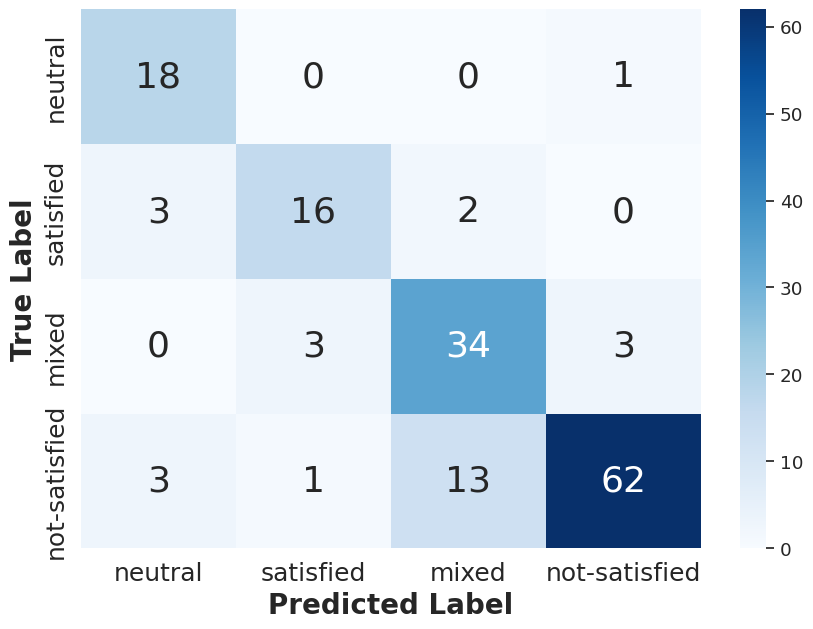

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 26})  # Increase font size here
    plt.xlabel('Predicted Label', fontsize=20, fontweight='bold')
    plt.ylabel('True Label', fontsize=20, fontweight='bold')
    plt.xticks(fontsize=18)  # Increase x-axis tick label size and make bold
    plt.yticks(fontsize=18)  # Increase y-axis tick label size and make bold

    plt.show()
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
plot_confusion_matrix(cm, labels=['neutral', 'satisfied', 'mixed', 'not-satisfied'])

# GPT-4o mini

In [ ]:
import numpy as np
import json
import os

SAVE = []

model = "ft:gpt-4o-mini-2024-07-18:leaflab:surveyanalysisfinetuning:9vzI1oD2"
system_msg = """You are a helpful and harmless AI assistant. You are helping to classify school survey comments into different categories. You will be given a school survey comment and you must respond with one of the following categories: not-satisfied, satisfied, both and neutral. Choose based on the following rules:

SATISFIED (Select if the comment reflects a high level (atleast 75%) of satisfaction, with little or no suggestions for improvement.)
DISSATISFIED (Select if the comment expresses a high level (atleast 75%) of dissatisfaction or dedicates a significant portion (atleast 75%) to suggesting improvements.)
MIXED (Select if the comment shows a balanced mix (50% each) of satisfaction and dissatisfaction/(suggestions for improvement).)
NEUTRAL (Select if there is no direct/indirect satisfation/dissatisfaction/suggestions and the respondent has not personally used or experienced mental health services.)
"""
client = OpenAI(api_key = "")

y_pred = []

dir = '/content/drive/MyDrive/github_LEAF_LAB/survey_analysis/finetuned_results/gpt4o_mini/'
file_path = os.path.join(dir, '9vzI1oD2')

if not os.path.exists(dir):
  os.makedirs(dir)

for idx, msg in enumerate(x_test):
  answer = pipeline_desc(msg, client, model, system_msg)

  prediction = answer
  print(f'--------{idx}-START------------------------------------------------')
  print(f'Comment: {msg} \n\n')
  print(f'Label: {mapping["class_mapping_reverse"][str(y_test[idx])]}')
  print(f'Result: {prediction}')
  print(f'--------{idx}-END--------------------------------------------------')

  y_pred.append(mapping["class_mapping"][prediction])

  SAVE.append({'comment':msg, 'list':prediction})


  # save the SAVE as json in local
  with open(file_path, 'w') as outfile:
    json.dump(SAVE, outfile)

NotFoundError: Error code: 404 - {'error': {'message': 'The model `ft:gpt-4o-mini-2024-07-18:leaflab:surveyanalysisfinetuning:9vzI1oD2` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [ ]:
with open(file_path, 'r') as f:
  predictions = json.load(f)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        19
           1       0.76      0.76      0.76        21
           2       0.83      0.60      0.70        40
           3       0.92      0.84      0.87        79

    accuracy                           0.79       159
   macro avg       0.75      0.80      0.75       159
weighted avg       0.83      0.79      0.79       159



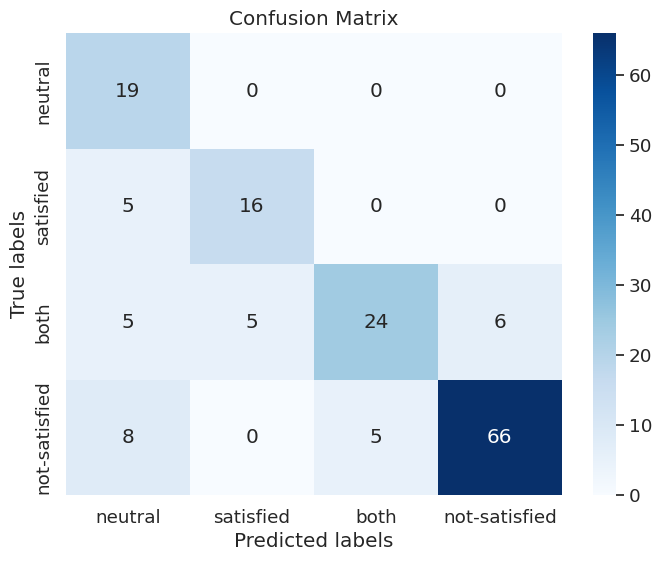

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
plot_confusion_matrix(cm, labels=['neutral', 'satisfied', 'both', 'not-satisfied'])